In [ ]:
from modules.data_class import DataState
from modules.tools import data_node
from modules.nodes import chatbot_with_tools, human_node, maybe_exit_human_node, maybe_route_to_tools

from langgraph.graph import StateGraph, START, END

from IPython.display import Image, display
from pprint import pprint
from typing import Literal

from langgraph.prebuilt import ToolNode

from collections.abc import Iterable
from IPython.display import display, clear_output
import sys

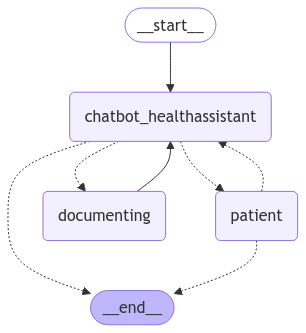

In [ ]:
graph_builder = StateGraph(DataState)

# Nodes
graph_builder.add_node("chatbot_healthassistant", chatbot_with_tools)
graph_builder.add_node("patient", human_node)
graph_builder.add_node("documenting", data_node)

# Chatbot -> {ordering, tools, human, END}
graph_builder.add_conditional_edges("chatbot_healthassistant", maybe_route_to_tools)
# Human -> {chatbot, END}
graph_builder.add_conditional_edges("patient", maybe_exit_human_node)
# TestCase_Paintrek
# Tools (both kinds) always route back to chat afterwards.
graph_builder.add_edge("documenting", "chatbot_healthassistant")

graph_builder.add_edge(START, "chatbot_healthassistant")
graph_with_order_tools = graph_builder.compile()

Image(graph_with_order_tools.get_graph().draw_mermaid_png())

In [ ]:
# The default recursion limit for traversing nodes is 25 - setting it higher means you can try a more complex order with multiple steps and round-trips.
config = {"recursion_limit": 1000}

# Uncomment this line to execute the graph:
# Clear output before running new states
clear_output(wait=True)

# Ensure messages print immediately
print("Executing the chatbot graph...", flush=True)
state = graph_with_order_tools.invoke({"messages": []}, config)
# display(state)  # Ensures state is shown in Jupyter
# sys.stdout.flush()

# pprint(state)

Executing the chatbot graph...
Model: Welcome to the Paintrek world. I am a health assistant, an interactive clinical recording system. I will ask you questions about your pain and related symptoms and record your responses.  I will then store this information securely. At any time, you can type `q` to quit.
User: Let's start
Model: First, I'll need some basic information for identification.  What is your full name, date of birth, gender, and contact number?  Also, please provide the name and contact information for an emergency contact.
User: I am Frank, DOB 1986-01-01, male, phone number is 12345, emergency name is Zoe, number is 67890.
Model: Thank you. Now, can you describe your main symptom and how long you've been experiencing it?
User: I had a headache, and it started two days ago.
Model: Okay. Let's move on to a pain assessment.  To help me understand your headache, please tell me:

1. Where is the pain located on your head? (e.g., forehead, temple, back of head)
2. On which si

In [4]:
state["data"]

{'ID': {'name': 'Frank',
  'DOB': '1986-01-01',
  'gender': 'male',
  'contact': '12345',
  'emergency_contact': 'Zoe, 67890'},
 'symptom': {'main_symptom': 'headache', 'symptom_length': 'two days'},
 'pain': {'pain_location': 'right head',
  'pain_side': 'right',
  'pain_intensity': 2.0,
  'pain_description': 'sharp',
  'start_time': '2 days ago',
  'radiation': False,
  'triggers': 'cold',
  'symptom': 'headache'},
 'medical_hist': {'medical_condition': 'sinus',
  'first_time': '2001-01-01',
  'surgery_history': 'None',
  'medication': 'ibprofin',
  'allergy': 'None'},
 'family_hist': {'family_history': 'Mom had lung cancer at 45'},
 'social_hist': {'occupation': 'data scientist',
  'smoke': False,
  'alcohol': False,
  'drug': False,
  'support_system': 'unknown',
  'living_condition': 'unknown'},
 'review_system': {'weight_change': 'None',
  'fever': False,
  'chill': False,
  'night_sweats': False,
  'sleep': 'well',
  'gastrointestinal': 'normal',
  'urinary': 'normal'},
 'pain_m